In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

In [3]:
df_new = pd.read_csv("encoded_flight_data.csv")
df_final = pd.get_dummies(df_new, columns=["Additional_Info"], drop_first=True)
X = df_final.drop("Price", axis=1)
y = df_final["Price"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)

In [15]:
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from catboost import CatBoostRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR

def evaluate_model(model, X_train, X_test, y_train, y_test):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    # Metrics
    r2 = r2_score(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_test, y_pred)
    print(f"Model: {model.__class__.__name__}")
    print(f"R² Score   : {r2:.4f}")
    print(f"MSE        : {mse:.4f}")
    print(f"RMSE       : {rmse:.4f}")
    print(f"MAE        : {mae:.4f}")
    print("-"*40)
    plt.figure(figsize=(7, 5)) 
    sns.kdeplot(y_test, label='Actual', color='blue', fill=True)
    sns.kdeplot(y_pred, label='Predicted', color='red', fill=True)
    plt.title(f"Distribution for {model.__class__.__name__}")
    plt.legend()
    plt.show()
    return {
        "Model": model.__class__.__name__,
        "R2": r2,
        "MSE": mse,
        "RMSE": rmse,
        "MAE": mae
    }

## Linear Regression

Model: LinearRegression
R² Score   : 0.6698
MSE        : 6922296.2505
RMSE       : 2631.0257
MAE        : 1791.6350
----------------------------------------


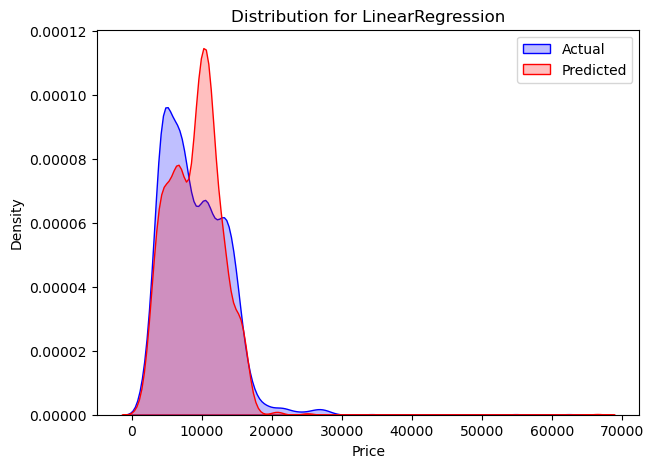

In [16]:
lin_reg = LinearRegression()
results_lr = evaluate_model(lin_reg, X_train, X_test, y_train, y_test)

## Ridge, Lasso And ElasticNet Regression

Model: Ridge
R² Score   : 0.6714
MSE        : 6887858.7025
RMSE       : 2624.4730
MAE        : 1791.1904
----------------------------------------


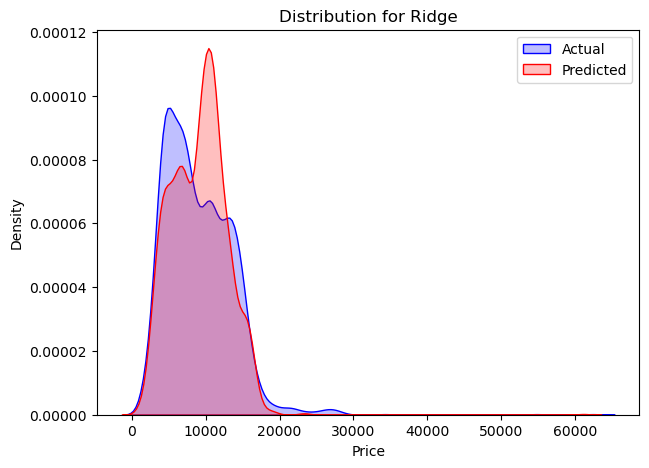

Model: Lasso
R² Score   : 0.6698
MSE        : 6922247.6712
RMSE       : 2631.0165
MAE        : 1791.6315
----------------------------------------


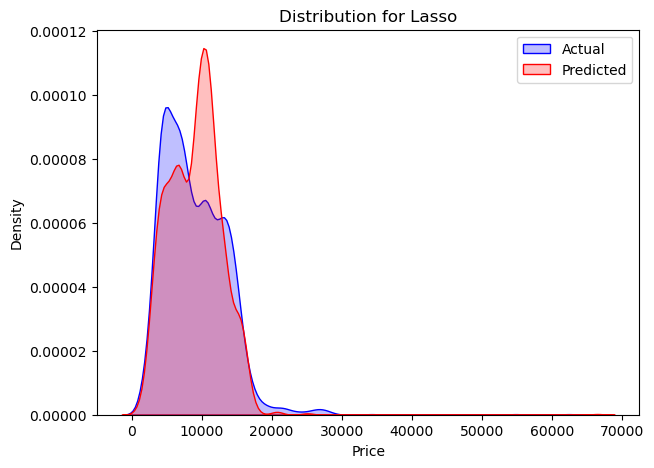

Model: ElasticNet
R² Score   : 0.6675
MSE        : 6968914.8928
RMSE       : 2639.8702
MAE        : 1799.7505
----------------------------------------


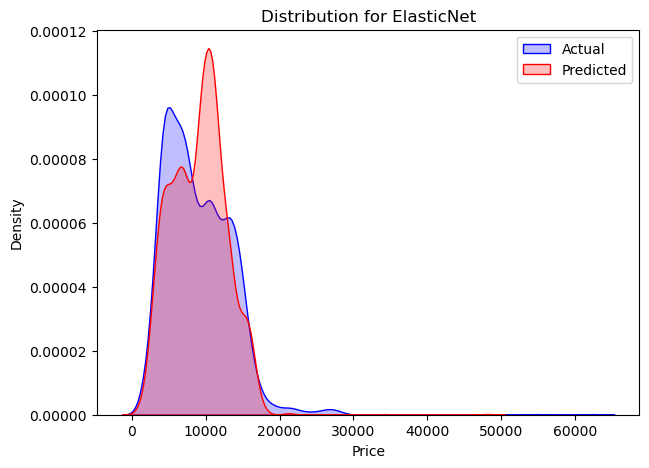

In [17]:
results_ridge = evaluate_model(Ridge(alpha=1.0, random_state=123),
                               X_train, X_test, y_train, y_test)
results_lasso = evaluate_model(Lasso(alpha=0.001, random_state=123, max_iter=10000),
                               X_train, X_test, y_train, y_test)
results_enet = evaluate_model(ElasticNet(alpha=0.001, l1_ratio=0.5, random_state=123, max_iter=10000),
                              X_train, X_test, y_train, y_test)

## Random Forest Regression

Model: RandomForestRegressor
R² Score   : 0.8912
MSE        : 2281013.4121
RMSE       : 1510.3024
MAE        : 696.5329
----------------------------------------


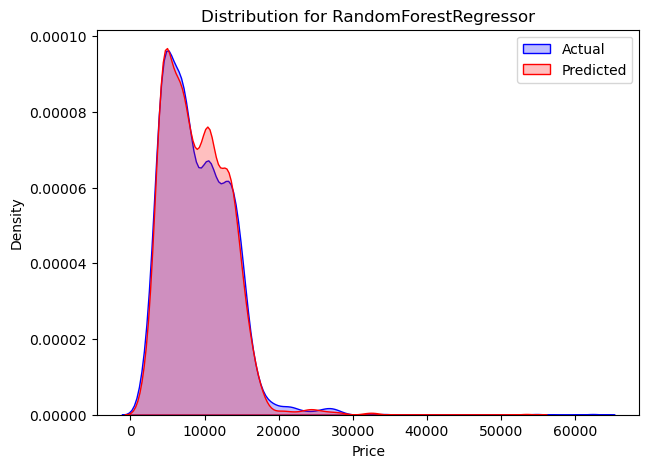

In [18]:
rf_reg_custom = RandomForestRegressor(
    n_estimators=200,          # We'll use 200 trees instead of the default 100
    max_depth=15,              # Limit the depth of each tree to 15 levels
    min_samples_split=5,       # A node must have at least 5 samples to be split
    n_jobs=-1,                 # Use all available CPU cores
    random_state=123           # For reproducibility
)
results_rf_custom = evaluate_model(rf_reg_custom, X_train, X_test, y_train, y_test)

## Boosting Algos (Gradient, XGBoost, LightGBM, CatBoost)

Model: GradientBoostingRegressor
R² Score   : 0.8122
MSE        : 3935797.1206
RMSE       : 1983.8844
MAE        : 1282.3622
----------------------------------------


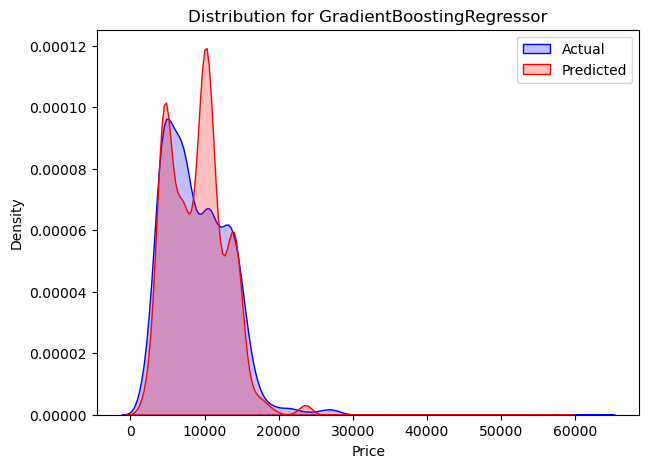

Model: XGBRegressor
R² Score   : 0.8922
MSE        : 2260493.9298
RMSE       : 1503.4939
MAE        : 736.0784
----------------------------------------


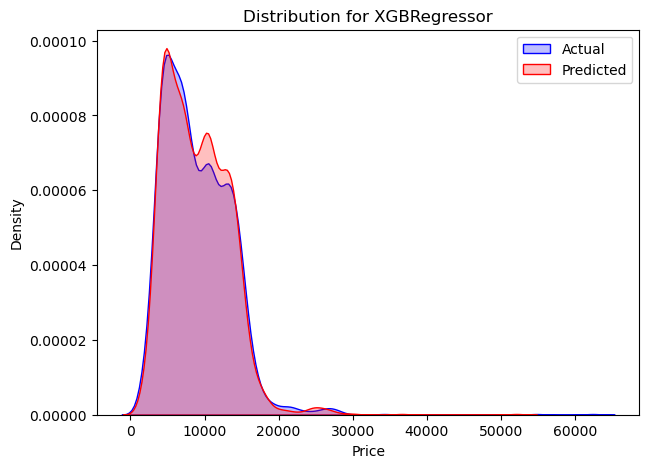

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000808 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 190
[LightGBM] [Info] Number of data points in the train set: 8546, number of used features: 31
[LightGBM] [Info] Start training from score 9113.189913
Model: LGBMRegressor
R² Score   : 0.8639
MSE        : 2852797.2681
RMSE       : 1689.0226
MAE        : 909.9958
----------------------------------------


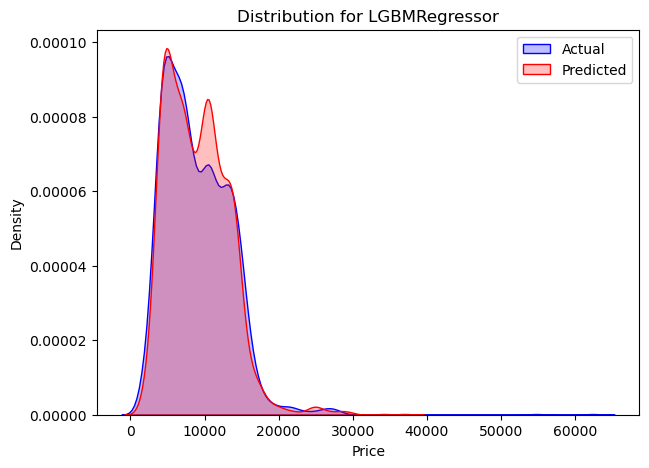

Model: CatBoostRegressor
R² Score   : 0.8926
MSE        : 2251186.5191
RMSE       : 1500.3955
MAE        : 810.2632
----------------------------------------


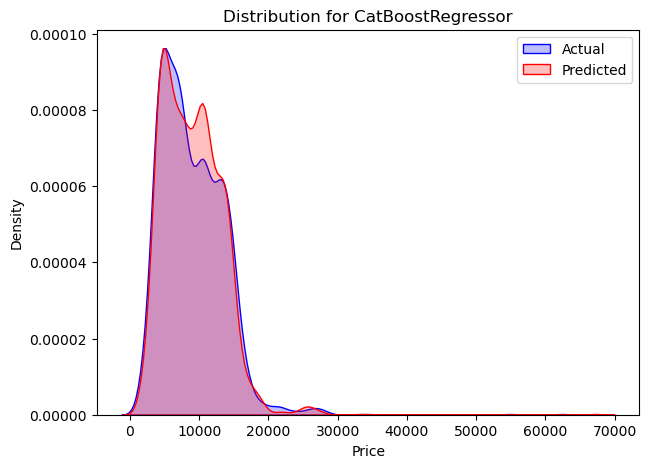

In [19]:
gbr = GradientBoostingRegressor(random_state=123)
results_gbr = evaluate_model(gbr, X_train, X_test, y_train, y_test)
xgb = XGBRegressor(random_state=123)
results_xgb = evaluate_model(xgb, X_train, X_test, y_train, y_test)
lgbm = LGBMRegressor(random_state=123)
results_lgbm = evaluate_model(lgbm, X_train, X_test, y_train, y_test)
cat = CatBoostRegressor(random_state=123, verbose=0)
results_cat = evaluate_model(cat, X_train, X_test, y_train, y_test)

## KNN , Support Vector And Decision Tree Regressor

Model: KNeighborsRegressor
R² Score   : 0.5983
MSE        : 8420344.2975
RMSE       : 2901.7830
MAE        : 1771.1292
----------------------------------------


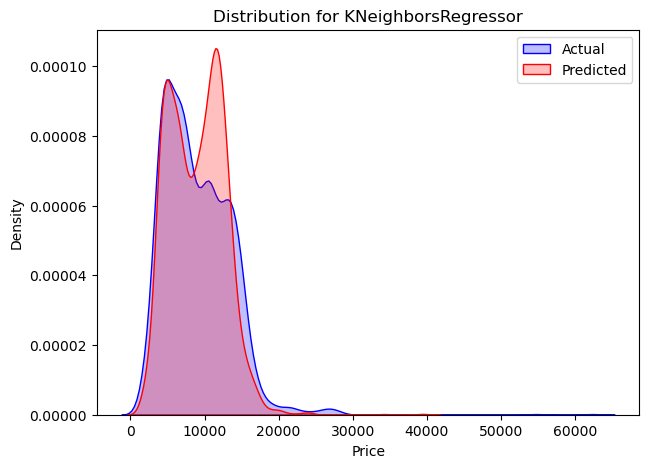

Model: DecisionTreeRegressor
R² Score   : 0.8223
MSE        : 3723872.0509
RMSE       : 1929.7337
MAE        : 766.4985
----------------------------------------


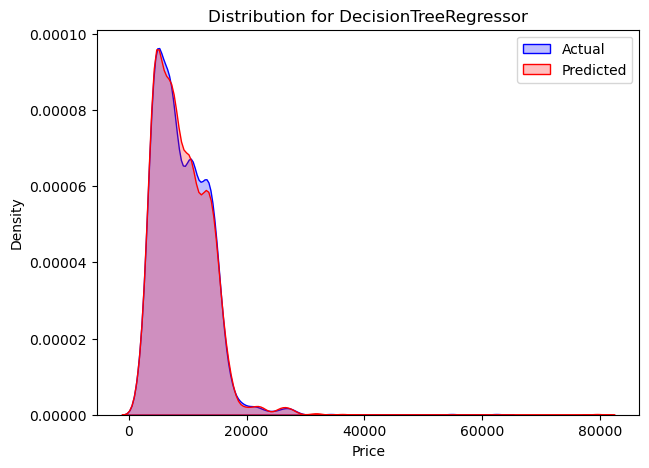

Model: SVR
R² Score   : -0.0177
MSE        : 21333197.2783
RMSE       : 4618.7874
MAE        : 3565.9515
----------------------------------------


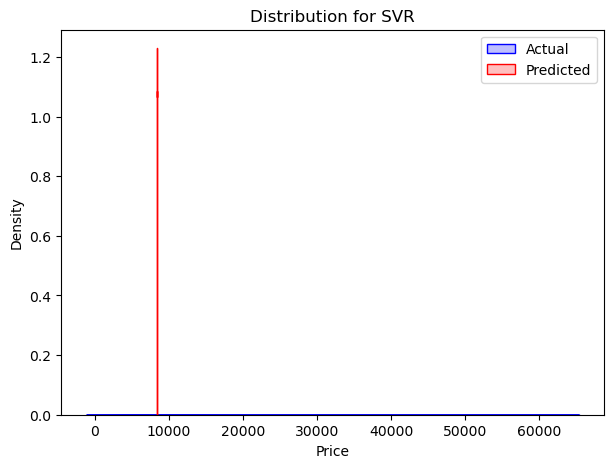

In [20]:
knn_reg = KNeighborsRegressor(n_neighbors=5,n_jobs=-1)
results_knn = evaluate_model(knn_reg, X_train, X_test, y_train, y_test)
dt_reg = DecisionTreeRegressor(random_state=123)
results_dt = evaluate_model(dt_reg, X_train, X_test, y_train, y_test)
svr = SVR()
results_svr = evaluate_model(svr, X_train, X_test, y_train, y_test)

## HyperParameter Tuning For Random Forest Regressor

In [21]:
from sklearn.model_selection import RandomizedSearchCV

In [22]:
param_grid_rf = {
    'n_estimators': [100, 200, 300, 500, 700],
    'max_depth': [10, 15, 20, 25, 30, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2', 1.0] # 1.0 is equivalent to all features
}

In [23]:
rf = RandomForestRegressor(random_state=123)
rf_random_search = RandomizedSearchCV(
    estimator=rf,
    param_distributions=param_grid_rf,
    n_iter=50,
    cv=5,
    verbose=2,
    random_state=123,
    n_jobs=-1
)

In [24]:
print("Starting RandomForestRegressor tuning...")
rf_random_search.fit(X_train, y_train)
print("\nBest Parameters found for RandomForestRegressor:")
print(rf_random_search.best_params_)
best_rf = rf_random_search.best_estimator_
y_pred_rf_tuned = best_rf.predict(X_test)
print("\nRandomForestRegressor Performance (Tuned):")
print(f"R² Score: {r2_score(y_test, y_pred_rf_tuned):.4f}")
print(f"RMSE: {np.sqrt(mean_squared_error(y_test, y_pred_rf_tuned)):.4f}")

Starting RandomForestRegressor tuning...
Fitting 5 folds for each of 50 candidates, totalling 250 fits

Best Parameters found for RandomForestRegressor:
{'n_estimators': 700, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 1.0, 'max_depth': 15}

RandomForestRegressor Performance (Tuned):
R² Score: 0.8929
RMSE: 1498.3341


## HyperParameter Tuning For XGBoost Regressor

In [25]:
param_grid_xgb = {
    'n_estimators': [100, 200, 300, 500],
    'learning_rate': [0.01, 0.05, 0.1, 0.2],
    'max_depth': [3, 5, 7, 10, 12],
    'subsample': [0.7, 0.8, 0.9, 1.0],
    'colsample_bytree': [0.7, 0.8, 0.9, 1.0]
}

In [26]:
xgb = XGBRegressor(random_state=123)
xgb_random_search = RandomizedSearchCV(
    estimator=xgb,
    param_distributions=param_grid_xgb,
    n_iter=50,
    cv=5,
    verbose=2,
    random_state=123,
    n_jobs=-1
)

In [27]:
print("\nStarting XGBRegressor tuning...")
xgb_random_search.fit(X_train, y_train)
print("\nBest Parameters found for XGBRegressor:")
print(xgb_random_search.best_params_)
best_xgb = xgb_random_search.best_estimator_
y_pred_xgb_tuned = best_xgb.predict(X_test)
print("\nXGBRegressor Performance (Tuned):")
print(f"R² Score: {r2_score(y_test, y_pred_xgb_tuned):.4f}")
print(f"RMSE: {np.sqrt(mean_squared_error(y_test, y_pred_xgb_tuned)):.4f}")


Starting XGBRegressor tuning...
Fitting 5 folds for each of 50 candidates, totalling 250 fits

Best Parameters found for XGBRegressor:
{'subsample': 0.7, 'n_estimators': 500, 'max_depth': 7, 'learning_rate': 0.1, 'colsample_bytree': 1.0}

XGBRegressor Performance (Tuned):
R² Score: 0.8907
RMSE: 1513.7719


## HyperParameter Tuning For CatBoost Regressor

In [29]:
param_grid_cat = {
    'iterations': [100, 200, 300, 500, 700],
    'learning_rate': [0.01, 0.05, 0.1],
    'depth': [4, 6, 8, 10],
    'l2_leaf_reg': [1, 3, 5, 7, 9], # L2 Regularization
    'subsample': [0.7, 0.8, 0.9, 1.0]
}

In [30]:
cat = CatBoostRegressor(random_state=123, verbose=0)
cat_random_search = RandomizedSearchCV(
    estimator=cat,
    param_distributions=param_grid_cat,
    n_iter=50,
    cv=5,
    verbose=2,
    random_state=123,
    n_jobs=-1
)

In [31]:
print("\nStarting CatBoostRegressor tuning...")
cat_random_search.fit(X_train, y_train)
print("\nBest Parameters found for CatBoostRegressor:")
print(cat_random_search.best_params_)
best_cat = cat_random_search.best_estimator_
y_pred_cat_tuned = best_cat.predict(X_test)
print("\nCatBoostRegressor Performance (Tuned):")
print(f"R² Score: {r2_score(y_test, y_pred_cat_tuned):.4f}")
print(f"RMSE: {np.sqrt(mean_squared_error(y_test, y_pred_cat_tuned)):.4f}")


Starting CatBoostRegressor tuning...
Fitting 5 folds for each of 50 candidates, totalling 250 fits

Best Parameters found for CatBoostRegressor:
{'subsample': 0.9, 'learning_rate': 0.1, 'l2_leaf_reg': 7, 'iterations': 700, 'depth': 10}

CatBoostRegressor Performance (Tuned):
R² Score: 0.8940
RMSE: 1490.9229


# Distplots fro our three Hyper Tuned Models

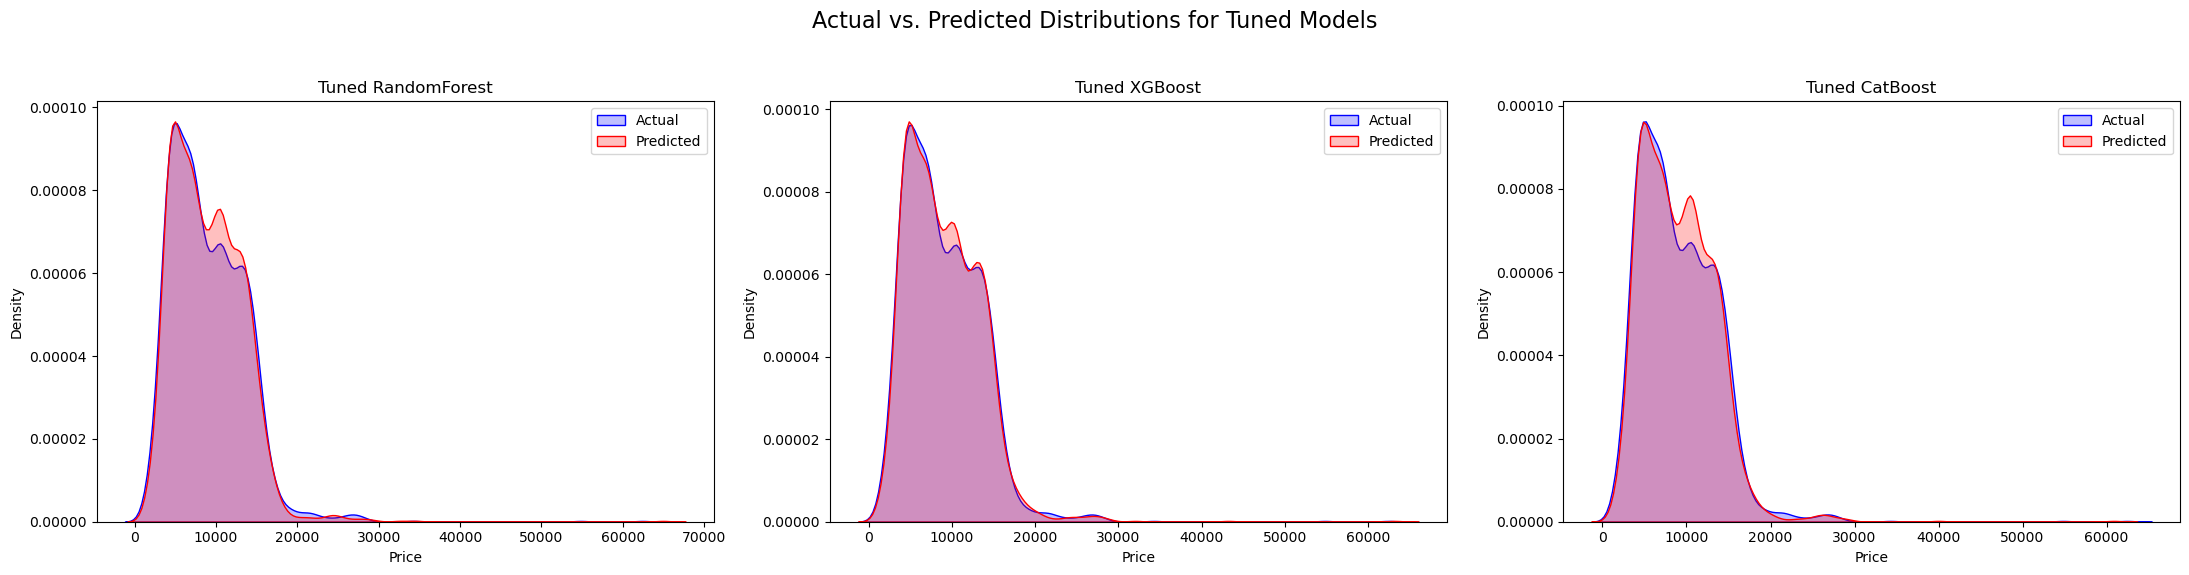

In [35]:
import matplotlib.pyplot as plt
import seaborn as sns
fig, axes = plt.subplots(1, 3, figsize=(22, 6))
fig.suptitle('Actual vs. Predicted Distributions for Tuned Models', fontsize=16)
# --- Plot 1: Tuned RandomForest ---
sns.kdeplot(y_test, ax=axes[0], label='Actual', color='blue', fill=True)
sns.kdeplot(best_rf.predict(X_test), ax=axes[0], label='Predicted', color='red', fill=True)
axes[0].set_title('Tuned RandomForest')
axes[0].legend()
# --- Plot 2: Tuned XGBoost ---
sns.kdeplot(y_test, ax=axes[1], label='Actual', color='blue', fill=True)
sns.kdeplot(best_xgb.predict(X_test), ax=axes[1], label='Predicted', color='red', fill=True)
axes[1].set_title('Tuned XGBoost')
axes[1].legend()
# --- Plot 3: Tuned CatBoost ---
sns.kdeplot(y_test, ax=axes[2], label='Actual', color='blue', fill=True)
sns.kdeplot(best_cat.predict(X_test), ax=axes[2], label='Predicted', color='red', fill=True)
axes[2].set_title('Tuned CatBoost')
axes[2].legend()
# Display the plots
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

## Saving Our Trained Models

In [32]:
import joblib

In [33]:
joblib.dump(best_cat, 'best_catboost_model.pkl')

['best_catboost_model.pkl']

## best_cat is the variable holding your best trained CatBoost model
 from the RandomizedSearchCV

 Save the model to a file

 You can then load it back into memory anytime you need it
 loaded_model = joblib.load('best_catboost_model.pkl')

 And use it to make predictions
 predictions = loaded_model.predict(new_data)

In [34]:
joblib.dump(best_rf, 'best_randomforest_model.pkl')
joblib.dump(best_xgb, 'best_xgboost_model.pkl')
print("Tuned RandomForest and XGBoost models have been saved successfully.")

Tuned RandomForest and XGBoost models have been saved successfully.
